In [1]:
import io
import pandas as pd
import random
import numpy
import matplotlib.pyplot as plt
from google.colab import files


In [2]:

df = pd.read_csv('random_1000.csv')


In [3]:
df.count

<bound method DataFrame.count of                       course_id       userid_DI  ... gender ndays_act
0    HarvardX/CB22x/2013_Spring  MHxPC130069875  ...      m         4
1    HarvardX/CB22x/2013_Spring  MHxPC130114587  ...      m         4
2    HarvardX/CB22x/2013_Spring  MHxPC130122866  ...      m         1
3    HarvardX/CB22x/2013_Spring  MHxPC130470188  ...      m         2
4    HarvardX/CB22x/2013_Spring  MHxPC130263156  ...      m         2
..                          ...             ...  ...    ...       ...
995  HarvardX/CB22x/2013_Spring  MHxPC130289759  ...      f         1
996  HarvardX/CB22x/2013_Spring  MHxPC130474924  ...      m         4
997  HarvardX/CB22x/2013_Spring  MHxPC130153023  ...      f         1
998  HarvardX/CB22x/2013_Spring  MHxPC130233232  ...      m         0
999  HarvardX/CB22x/2013_Spring  MHxPC130167152  ...      f         0

[1000 rows x 7 columns]>

In [4]:
n = len(df.index) #1000
m = 10
uniform_range_lower = 0
uniform_range_upper = 1
sigma_2 = 1

In [5]:
df.iloc[0]

course_id            HarvardX/CB22x/2013_Spring
userid_DI                        MHxPC130069875
final_cc_cname_DI                         India
LoE_DI                                Secondary
YoB                                        1994
gender                                        m
ndays_act                                     4
Name: 0, dtype: object

In [6]:
df.iloc[0,6]

4

In [7]:
def mean_query(df, m, n, uniform_range_lower, uniform_range_upper, sigma_2):
  
  q = [0 for i in range(n)]
  for i in range(n):
    q[i] = int(df.iloc[i,6])
  
  random_arr = [[random.uniform(0,1) for i in range(m)] for j in range(n)]
  random_arr[0]

  for i in range(n):
    random_arr[i][-1] = q[i] - sum(random_arr[i][:-1])
  random_arr[0]

  x = zip(*random_arr)
  curator_output = []
  for y in x:
    curator_output.append(sum(y))

  curator_noisy = []
  for c in curator_output:
    curator_noisy.append(random.gauss(c, sigma_2))

  private_ans = sum(curator_noisy)/n

  

  return private_ans

In [8]:
def true_mean_value(n):
  q = [0 for i in range(n)]
  for i in range(n):
    q[i] = int(df.iloc[i,6])
  actual_ans = sum(q)/n
  return actual_ans

In [9]:
true_mean_value(1000)

3.78

In [10]:
mean_query(df=df, m=m, n=n, uniform_range_lower=uniform_range_lower, uniform_range_upper=uniform_range_upper, sigma_2=sigma_2)

3.776799859797385

In [11]:
m_list = []
for i in range(1,n+1):
  """
  if i <= 100:
    m_list.append(i)
  elif i%10 == 0:
    m_list.append(i)
  """
  m_list.append(i)




In [12]:
private_ans = []
for m in m_list:
  y = mean_query(df=df, m=m, n=n, uniform_range_lower=uniform_range_lower, uniform_range_upper=uniform_range_upper, sigma_2=sigma_2)
  print(m,y)
  private_ans.append((m,y))

 


1 3.780813911498368
2 3.7818858137368885
3 3.7800307995857665
4 3.7772900053712952
5 3.775751976794207
6 3.7797279949422147
7 3.7754243329748562
8 3.7819719340658238
9 3.7829347973397
10 3.7789851299806707
11 3.7804679351433768
12 3.7787545662944866
13 3.7829385565533773
14 3.7756114680444126
15 3.7758241425668406
16 3.7807926421686107
17 3.7752983951777725
18 3.7895304619595853
19 3.7810196300923598
20 3.7771723139104196
21 3.788035613690486
22 3.7813443516318612
23 3.7747267304785828
24 3.7821537387057487
25 3.7700819296126027
26 3.7855042030700514
27 3.7880099933584477
28 3.785354152854985
29 3.786619303051315
30 3.7787389370105173
31 3.7895989575010045
32 3.7864420011812983
33 3.7778776833376324
34 3.7737476692557665
35 3.780909753643504
36 3.7739776640678193
37 3.7900642701225697
38 3.7813773775375883
39 3.775021374569309
40 3.7780965450409822
41 3.7812743940524
42 3.7706924900899974
43 3.775013190917296
44 3.772387048946133
45 3.782035990602857
46 3.7692047381267475
47 3.77520313

In [13]:
actual_ans = true_mean_value(n)
actual_ans

3.78

In [14]:
textfile = open("mean_query_gaussian.txt", "w")
for element in private_ans:
  
  textfile.write(','.join(str(e) for e in element))
  textfile.write("\n")
textfile.close()

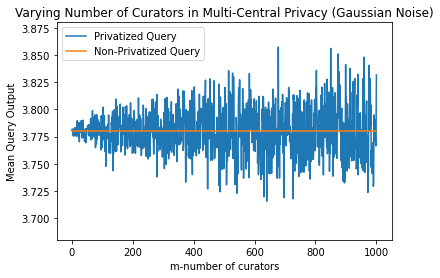

In [15]:
actual_ans_list = [actual_ans for i in range(n)]  #n=1000, m=1-1000
private_ans_list = [p[1] for p in private_ans ]

plt.plot(m_list, private_ans_list, label="Privatized Query")
plt.plot(m_list, actual_ans_list, label="Non-Privatized Query")
plt.plot()

plt.xlabel("m-number of curators")
plt.ylabel("Mean Query Output")
plt.title("Varying Number of Curators in Multi-Central Privacy (Gaussian Noise)")
plt.ylim([3.68, 3.88])
plt.legend()
plt.savefig('mean_query_gaussian.png')
plt.show()

In [16]:
# #zoom plot 
# plt.plot(m_list[:100], private_ans_list[:100], label="Privatized Query")
# plt.plot(m_list[:100], actual_ans_list[:100], label="Non-Privatized Query")
# plt.plot()

# plt.xlabel("m-number of curators")
# plt.ylabel("Mean Query Output")
# plt.title("Varying Number of Curators in Multi-Central Privacy (Gaussian Noise)")
# plt.legend()
# plt.show()

In [17]:
#utility evaluation
n_list = [100, 500, 1000]
m_list2 = [1, 10, 50, 100, 500, 1000]

actual_ans = true_mean_value(n)

textfile = open("varying_n_laplace.txt", "w")
for n in n_list:
  util = []
  for m in m_list2:
    if m <= n:
      error = []
      for i in range(100):
        y = mean_query(df=df, m=m, n=n, uniform_range_lower=uniform_range_lower, uniform_range_upper=uniform_range_upper, sigma_2=sigma_2)
        error.append(abs(actual_ans-y)/actual_ans)
      average_error = sum(error)/len(error)
      print(n, m, average_error)
      util.append((m, average_error))

  for element in util:
    textfile.write(f'n={n},m={element[0]},error={element[1]}')
    textfile.write(','.join(str(e) for e in element))
    textfile.write("\n")

textfile.close()

100 1 0.12678866149474252
100 10 0.1265278661778126
100 50 0.124662979816301
100 100 0.12898938362161755
500 1 0.05446316999505289
500 10 0.054446584030416315
500 50 0.05360825924500116
500 100 0.05425735874347995
500 500 0.05476906711906681
1000 1 0.00020312298701074974
1000 10 0.0006583733272808242
1000 50 0.001451573098579796
1000 100 0.0020179662821166984
1000 500 0.004210993028900552
1000 1000 0.006918749290224814
